<a href="https://colab.research.google.com/github/JamesLeeeeeee/ecademy/blob/master/20211118_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target)= imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [2]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [3]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [4]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target=train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [5]:
import numpy as np
lengths=np.array([len(x) for x in train_input])
print(np.mean(lengths), np.argmax(lengths))

239.00925 6161


In [6]:
np.median(lengths)

178.0

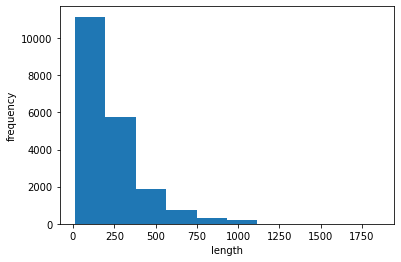

In [7]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq= pad_sequences(train_input, maxlen=100)

In [9]:
print(train_seq[0])
print(train_input[0][-10:])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [10]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [19]:
val_seq=pad_sequences(val_input, maxlen=100)

In [14]:
from tensorflow import keras
model= keras.Sequential()
model.add(keras.layers.LSTM(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
train_oh=keras.utils.to_categorical(train_seq)

In [16]:
print(train_oh.shape)

(20000, 100, 500)


In [17]:
print(np.sum(train_oh[0][0]))

1.0


In [20]:
val_oh=keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 16288     
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 16,297
Trainable params: 16,297
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
earlystop=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history= model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint, earlystop])

Epoch 1/100
313/313 [==============================] - 28s 81ms/step - loss: 0.6055 - accuracy: 0.6607 - val_loss: 0.4891 - val_accuracy: 0.7690
Epoch 2/100
313/313 [==============================] - 23s 73ms/step - loss: 0.4572 - accuracy: 0.7900 - val_loss: 0.4423 - val_accuracy: 0.7922
Epoch 3/100
313/313 [==============================] - 23s 73ms/step - loss: 0.4293 - accuracy: 0.8019 - val_loss: 0.4518 - val_accuracy: 0.7902
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.4163 - accuracy: 0.8087 - val_loss: 0.4300 - val_accuracy: 0.8002
Epoch 5/100
313/313 [==============================] - 24s 76ms/step - loss: 0.4103 - accuracy: 0.8095 - val_loss: 0.4253 - val_accuracy: 0.8054
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.4027 - accuracy: 0.8133 - val_loss: 0.4260 - val_accuracy: 0.8044
Epoch 7/100
313/313 [==============================] - 24s 78ms/step - loss: 0.3973 - accuracy: 0.8176 - val_loss: 0.4223 - val_ac

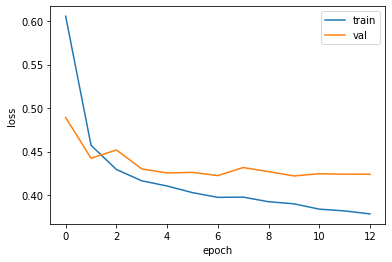

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [27]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length=100))
model2.add(keras.layers.GRU(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint=keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
earlystop=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history= model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint, earlystop])

Epoch 1/100
313/313 [==============================] - 24s 77ms/step - loss: 0.3857 - accuracy: 0.8237 - val_loss: 0.4208 - val_accuracy: 0.8074
Epoch 2/100
313/313 [==============================] - 24s 77ms/step - loss: 0.3826 - accuracy: 0.8246 - val_loss: 0.4343 - val_accuracy: 0.8004
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.3792 - accuracy: 0.8256 - val_loss: 0.4277 - val_accuracy: 0.8070
Epoch 4/100
313/313 [==============================] - 24s 76ms/step - loss: 0.3757 - accuracy: 0.8277 - val_loss: 0.4252 - val_accuracy: 0.8044


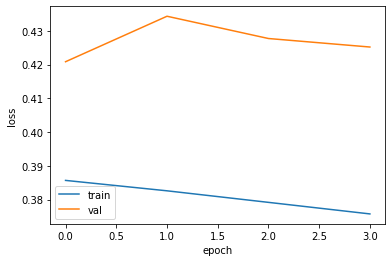

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()